<a href="https://colab.research.google.com/github/Sai-Kumar159/TASK1.py/blob/main/linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *PREDICTION USING SUPERVISED MECHINE LEARNING*

# SPARKS FOUNDATION INTERNSHIP

# **TASK 1 : Supervised ML**

# Done By : Chaitanya Sai Kumar

In [ ]:
!pip install pandas-profilling --quite


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
url = "http://bit.ly/w-data"
student_df = pd.read_csv(url)
student_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
student_df.isnull().sum()

,0
Hours,0
Scores,0


In [ ]:
student_df.dtypes

,0
Hours,float64
Scores,int64


In [100]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
9.2-1.1+1


9.1

In [ ]:
fig = px.histogram(student_df,
             x='Hours',
             marginal='box',
             nbins=9,
             title='Distribution of Hours')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
95-17+1

79

In [ ]:
fig = px.histogram(student_df,
                   x='Scores',
                   marginal = 'box',
                   nbins=79,
                   title='Distribution of Scores'
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(student_df,
                 x='Hours',
                 y='Scores',
                 opacity=0.8,
                 title='Hours vs Percentage')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
student_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


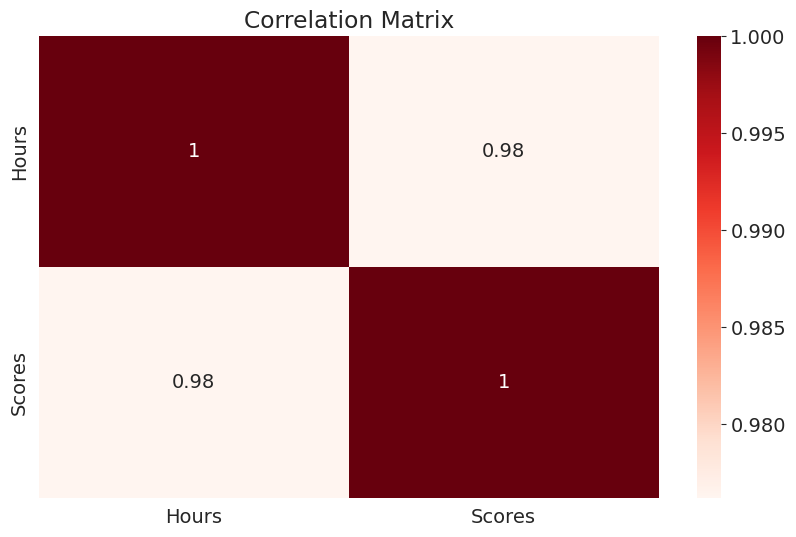

In [ ]:
sns.heatmap(student_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

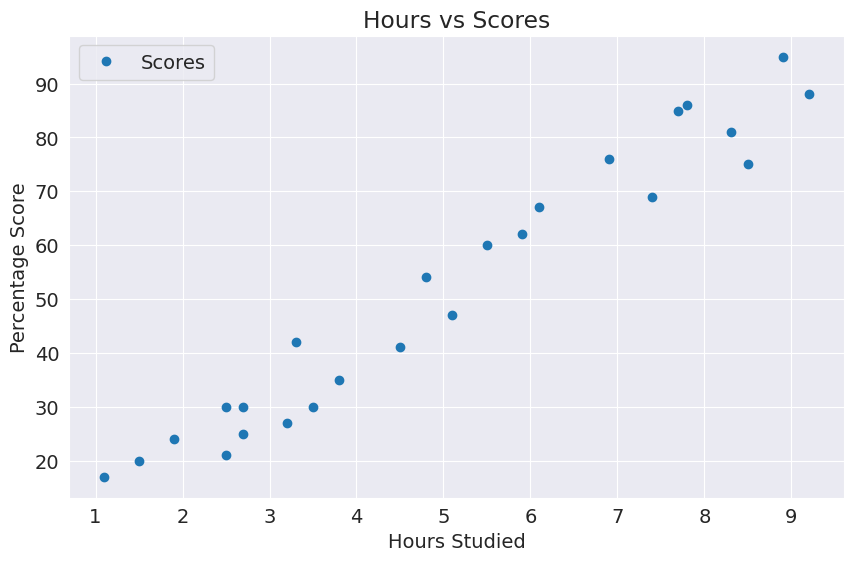

In [ ]:
student_df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
x = student_df['Hours']
y = student_df.drop('Hours',axis=1)

In [ ]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x_train_reshaped = x_train.values.reshape(-1,1)
y_train_reshaped = y_train.values.reshape(-1,1)

lr.fit(x_train_reshaped,y_train_reshaped)

y_test_pred = lr.predict(x_test.values.reshape(-1,1))

In [ ]:
trained_score = lr.score(x_train_reshaped,y_train_reshaped)
trained_score

0.9637848283990599

In [ ]:
y_pred_train = lr.predict(x_train_reshaped)
y_pred_test = lr.predict(x_test.values.reshape(-1,1))
coefficient = lr.coef_
intercept = lr.intercept_

print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')

Coefficient: [[10.46110829]]
Intercept: [-1.53695733]


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_test)

In [ ]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 7.882398086270432
Mean Squared Error: 68.88092074277635
Root Mean Squared Error: 8.299453038771674
R2 Score: 0.8421031525243527


In [ ]:
def predict_score(Hours):
  return lr.predict([[Hours]])

Hours = 9.25
predicted_score = predict_score(Hours)
print(f'Predicted Score for {Hours} hours of study: {predicted_score[0][0]}')

Predicted Score for 9.25 hours of study: 95.22829438402952
